This notebook tests the MMM Agent

In [1]:
import mlflow
from mlflow.models import ModelConfig
from databricks.sdk import WorkspaceClient
from openai import OpenAI

workspace_client = WorkspaceClient()
workspace_url = workspace_client.config.host
token = workspace_client.config.token
client = OpenAI(api_key=token, base_url=f"{workspace_url}/serving-endpoints")
config = ModelConfig(development_config="../config/agent/agent_config.yaml")

In [2]:
# Read our example questions
import pandas as pd
import numpy as np
questions_df = pd.read_json('questions.jsonl', lines=True)
row = questions_df.iloc[np.random.randint(0, len(questions_df))]

In [3]:
from mediamix.agents import create_initial_state, create_mmm_agent
mmm_agent = create_mmm_agent(client, config, token)
initial_state = create_initial_state(row["question"])

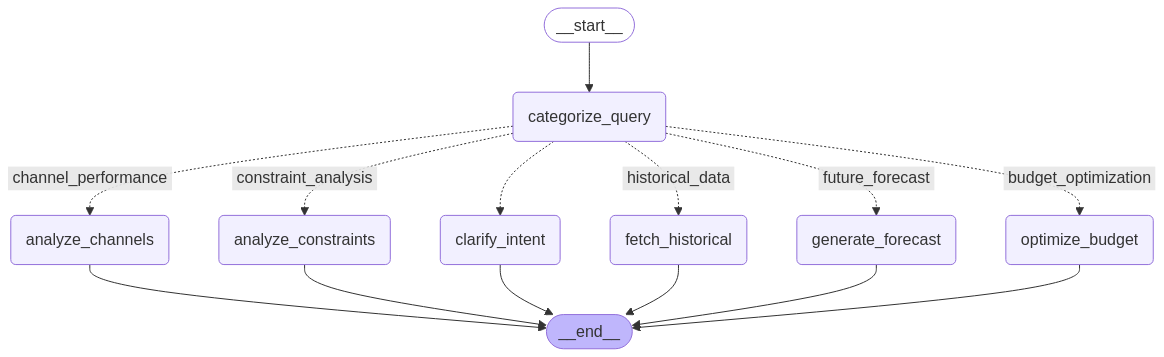

In [4]:
from IPython.display import Image, display
png = mmm_agent.get_graph().draw_mermaid_png()
display(Image(png))

In [5]:
initial_state = create_initial_state("Make a forecast for the next 12 months")
state = mmm_agent.invoke(initial_state)

In [6]:
state

{'messages': [HumanMessage(content='Make a forecast for the next 12 months', additional_kwargs={}, response_metadata={}),
  FunctionMessage(content='{"category": "future_forecast", "confidence": 5, "reasoning": "This question is directly asking for a projection of future performance, which is the primary characteristic of future_forecast."}', additional_kwargs={}, response_metadata={}, name='QueryCategorizer'),
  FunctionMessage(content='Here is your forecast!', additional_kwargs={}, response_metadata={}, name='BayesPredictor')],
 'query_category': 'future_forecast',
 'query_category_confidence': 5,
 'query_category_reasoning': 'This question is directly asking for a projection of future performance, which is the primary characteristic of future_forecast.',
 'current_step': 'bayes_predictor',
 'prediction': {'predictions': [87356088.2846781,
   85381601.18387353,
   81744085.91411352,
   84741699.05826865,
   92552364.71412537,
   94650080.06064248,
   103452254.4744442,
   102429657.7